In [3]:
import numpy as np
import pandas
import pandas as pd
import matplotlib.pyplot as plt
import torch

from Helper.ImportDatasets import df_epsilon, df_epsilon_crit
from Method.evaluation import get_quantile
plt.ioff()

In [5]:
# Importing the data
distributions_df = pd.read_pickle('Datasets/distributions.pkl')
metrics_point_df = pd.read_csv('Datasets/metrics_point.csv')
metrics_conf_df = pd.read_csv('Datasets/metrics_conf.csv')

In [7]:
import os

# for each network and run create plot of final distribution with confidence interval
networks = df_epsilon['network'].unique()


for network in networks:
    for run in range(10):
        path = 'Figures/Final distribution with confidence interval/'+network+'/'
        if not os.path.exists(path):
            os.makedirs(path)
        
        final_bins = distributions_df[distributions_df['network'] == network]['bins'].iloc[run]
        final_distribution = distributions_df[distributions_df['network'] == network]['distribution'].iloc[run]
        
        
        quantile, lower, upper = get_quantile(network, 0.05)
        
        #make plots
        fig, ax = plt.subplots()
        ax.bar(final_bins, final_distribution, align = 'edge', width=final_bins[1]-final_bins[0], label='final distribution')
        ax.axvline(quantile, color='y', label='quantile estimation')
        ax.axvline(quantile-0.002, color='y')
        ax.axvline(lower-0.002, color='r', label='95% confidence interval')
        ax.axvline(upper, color='r')
        
        # labels
        ax.set_xlabel('epsilon')
        ax.set_ylabel('probability')
        ax.set_title('Final distribution of epsilon for network ' + network + ' run ' + str(run))
        # make legend smaller
        ax.legend(loc='upper left', prop={'size': 8})
        
        plt.close(fig)
        # save figure
        fig.savefig(path + 'final_distribution_' + network + '_' + str(run) + '.png', bbox_inches='tight')

In [12]:
final_bins

tensor([0.0069, 0.0071, 0.0073, 0.0074, 0.0076, 0.0077, 0.0079, 0.0081, 0.0082,
        0.0084, 0.0085, 0.0087, 0.0088, 0.0090, 0.0092, 0.0093, 0.0095, 0.0096,
        0.0098, 0.0099, 0.0101, 0.0103, 0.0104, 0.0106, 0.0107, 0.0109, 0.0110,
        0.0112, 0.0114, 0.0115, 0.0117, 0.0118, 0.0120, 0.0121, 0.0123, 0.0125,
        0.0126, 0.0128, 0.0129, 0.0131, 0.0132, 0.0134, 0.0136, 0.0137, 0.0139,
        0.0140, 0.0142, 0.0144, 0.0145, 0.0147, 0.0148, 0.0150, 0.0151, 0.0153,
        0.0155, 0.0156, 0.0158, 0.0159, 0.0161, 0.0162, 0.0164, 0.0166, 0.0167,
        0.0169, 0.0170, 0.0172, 0.0173, 0.0175, 0.0177, 0.0178, 0.0180, 0.0181,
        0.0183, 0.0184, 0.0186, 0.0188, 0.0189, 0.0191, 0.0192, 0.0194, 0.0195,
        0.0197, 0.0199, 0.0200, 0.0202, 0.0203, 0.0205, 0.0206, 0.0208, 0.0210,
        0.0211, 0.0213, 0.0214, 0.0216, 0.0218, 0.0219, 0.0221, 0.0222, 0.0224,
        0.0225, 0.0227, 0.0229, 0.0230, 0.0232, 0.0233, 0.0235, 0.0236, 0.0238,
        0.0240, 0.0241, 0.0243, 0.0244, 

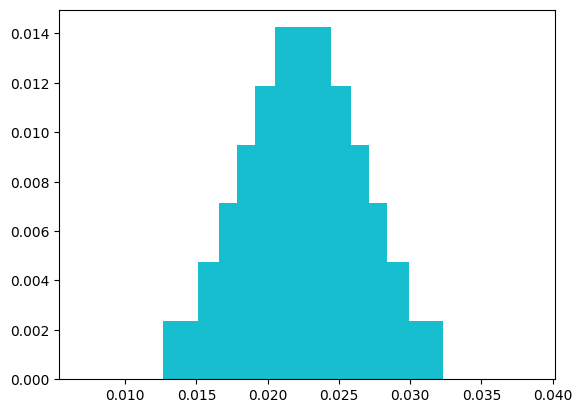

In [16]:
# put all 10 runs into one plot with different colors
for i in range(10):
    
    quantile, lower, upper = get_quantile(network, 0.05)
    final_bins = distributions_df[distributions_df['network'] == network]['bins'].iloc[run]
    final_distribution = distributions_df[distributions_df['network'] == network]['distribution'].iloc[run]
    plt.bar(final_bins, final_distribution, align = 'edge', width=final_bins[1]-final_bins[0], label='final distribution')
    

In [44]:
# plots for metrics
metric1 = metrics_conf_df['metric_1'].to_numpy()
metric2 = metrics_conf_df['metric_2'].to_numpy()
metric3 = metrics_conf_df['metric_3'].to_numpy()
metric4 = metrics_conf_df['metric_4'].to_numpy()

In [42]:
# make dataframe of metric 1
dat1 = metric1.reshape(-1,10).mean(axis=1)
df = pd.DataFrame(networks, columns=['network'])
df['metric 1'] = dat1
print(df)

              network  metric 1
0           mnist-net       1.0
1     mnist-net_256x2       1.0
2     mnist-net_256x4       0.9
3     mnist-net_256x6       0.9
4            mnist_nn       1.0
5    mnist_relu_3_100       0.9
6     mnist_relu_3_50       0.9
7   mnist_relu_4_1024       0.9
8    mnist_relu_6_100       1.0
9    mnist_relu_6_200       1.0
10   mnist_relu_9_100       1.0
11   mnist_relu_9_200       1.0


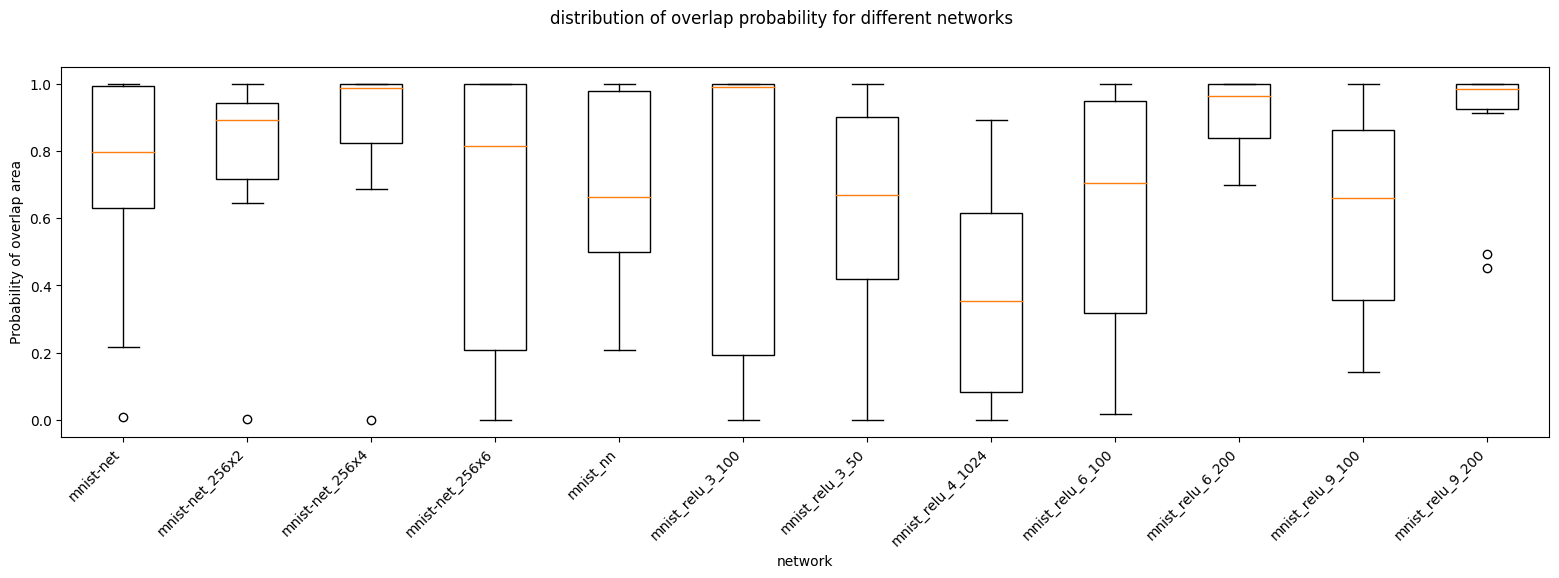

In [59]:
from Helper.Plotting import Boxplots

#boxplots for metric 2
dat2 = metric2.reshape(-1,10)
plots = {networks[i]: dat2[i] for i in range(len(networks))}
Boxplots(plots, figsize=(3,1), ylabel='Probability of overlap area', xlabel='network', title='distribution of overlap probability for different networks', xrot=True, save='Figures/metric2_conf.png')

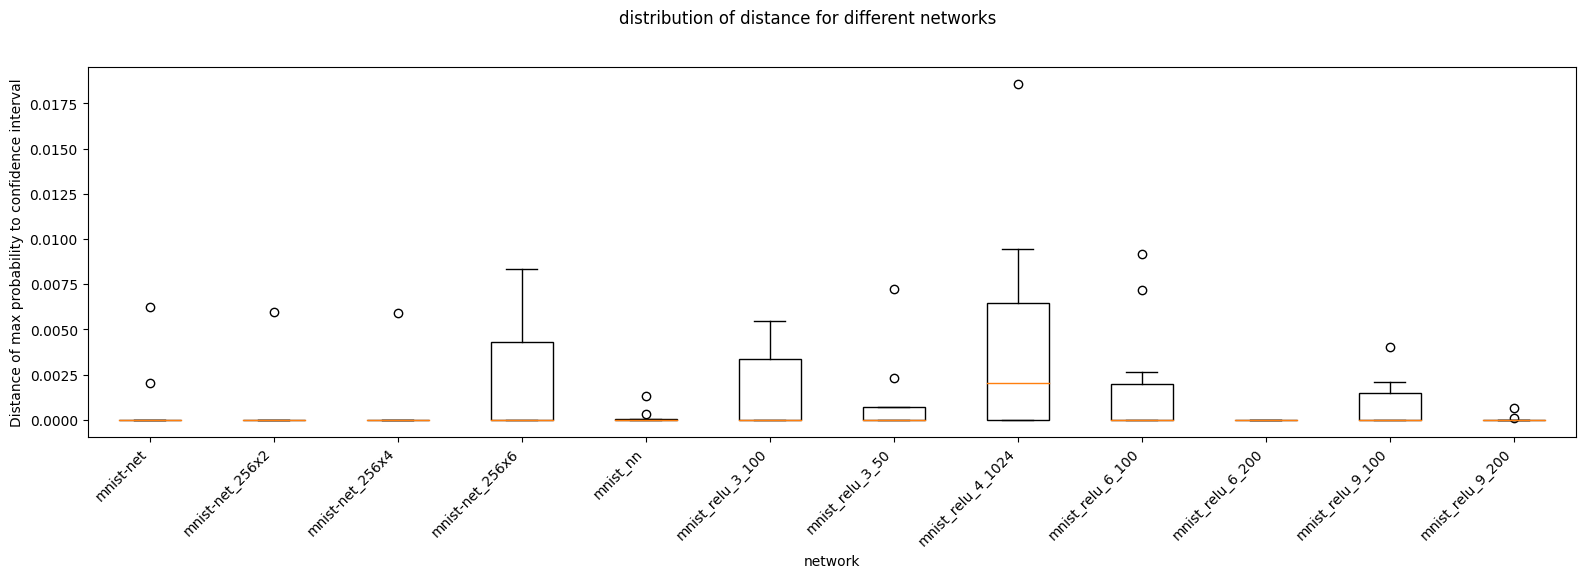

In [60]:
# same but for metric 3
dat3 = metric3.reshape(-1,10)
plots = {networks[i]: dat3[i] for i in range(len(networks))}
Boxplots(plots, figsize=(3,1), ylabel='Distance of max probability to confidence interval', xlabel='network', title='distribution of distance for different networks', xrot=True, save='Figures/metric3_conf.png')

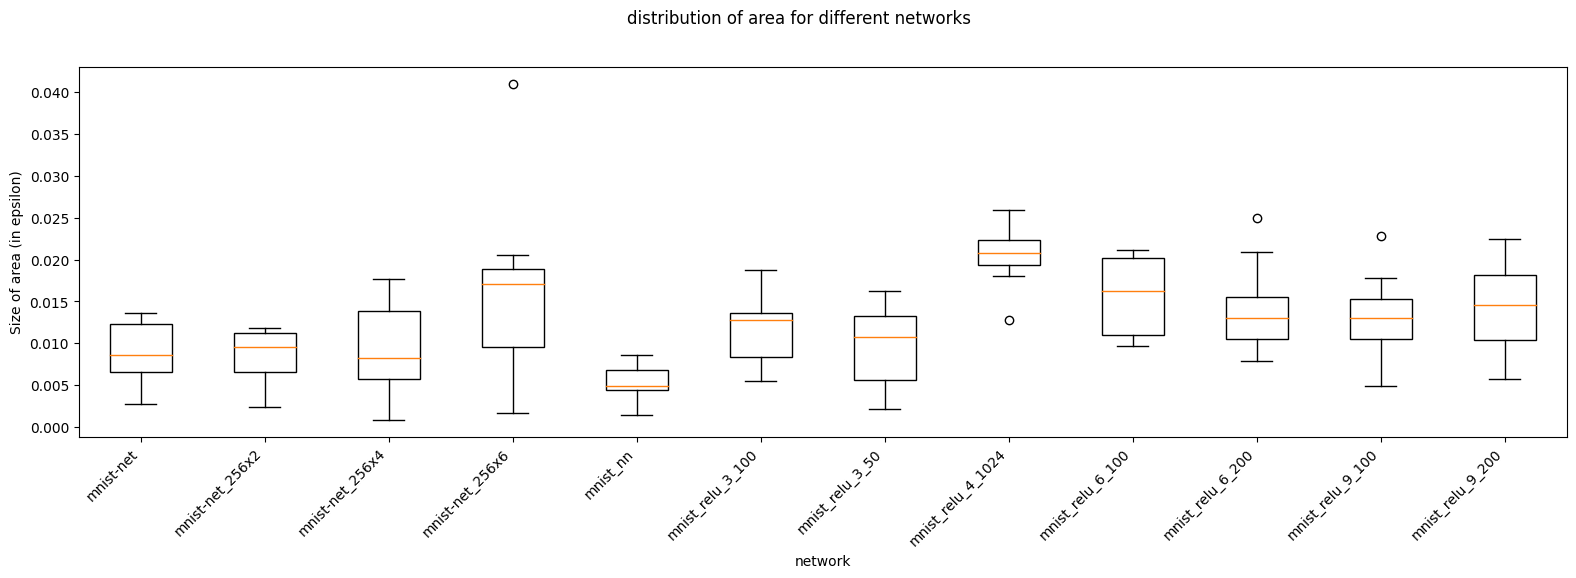

In [61]:
# same but for metric 4
dat4 = metric4.reshape(-1,10)
plots = {networks[i]: dat4[i] for i in range(len(networks))}
Boxplots(plots, figsize=(3,1), ylabel='Size of area (in epsilon)', xlabel='network', title='distribution of area for different networks', xrot=True, save='Figures/metric4_conf.png')

In [62]:
# plots for metrics (points)
metric1 = metrics_point_df['metric_1'].to_numpy()
metric2 = metrics_point_df['metric_2'].to_numpy()
metric3 = metrics_point_df['metric_3'].to_numpy()
metric4 = metrics_point_df['metric_4'].to_numpy()

In [63]:
# make dataframe of metric 1
dat1 = metric1.reshape(-1,10).mean(axis=1)
df = pd.DataFrame(networks, columns=['network'])
df['metric 1'] = dat1
print(df)

              network  metric 1
0           mnist-net       0.9
1     mnist-net_256x2       0.8
2     mnist-net_256x4       0.7
3     mnist-net_256x6       0.5
4            mnist_nn       0.4
5    mnist_relu_3_100       0.5
6     mnist_relu_3_50       0.6
7   mnist_relu_4_1024       0.6
8    mnist_relu_6_100       0.5
9    mnist_relu_6_200       0.9
10   mnist_relu_9_100       0.6
11   mnist_relu_9_200       0.7


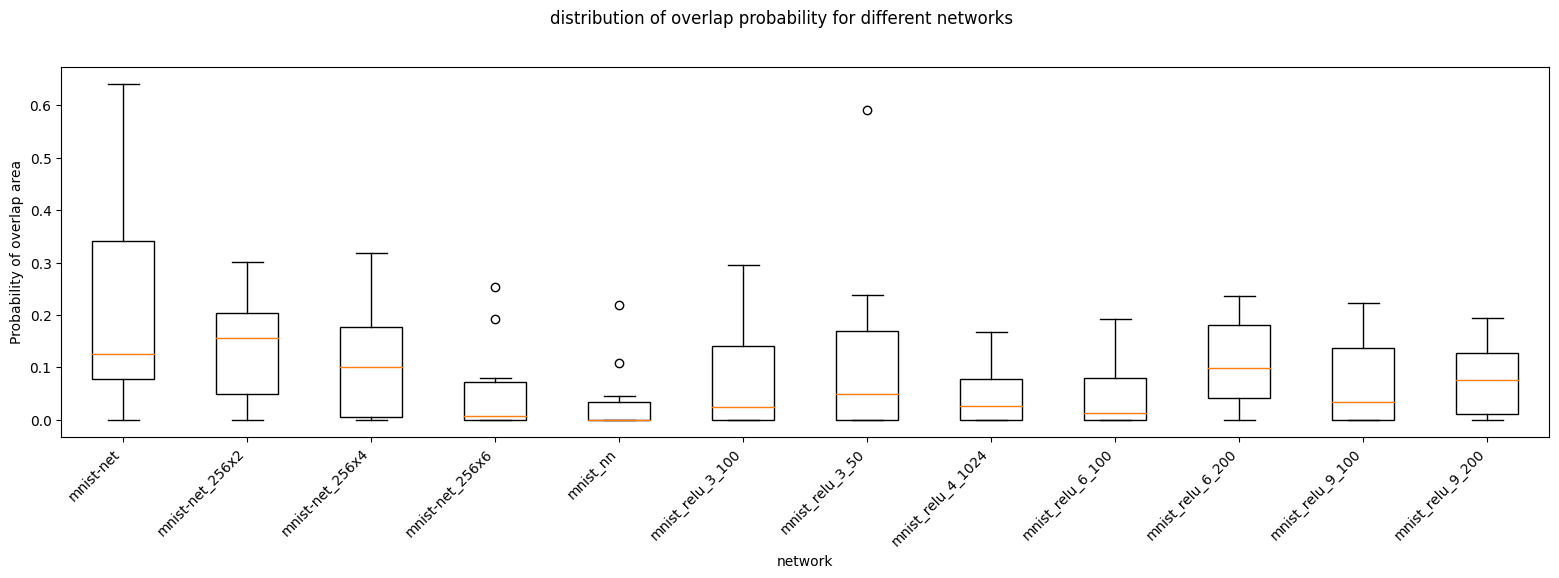

In [64]:
from Helper.Plotting import Boxplots

#boxplots for metric 2
dat2 = metric2.reshape(-1,10)
plots = {networks[i]: dat2[i] for i in range(len(networks))}
Boxplots(plots, figsize=(3,1), ylabel='Probability of overlap area', xlabel='network', title='distribution of overlap probability for different networks', xrot=True, save='Figures/Metrics Point/metric2_point.png')

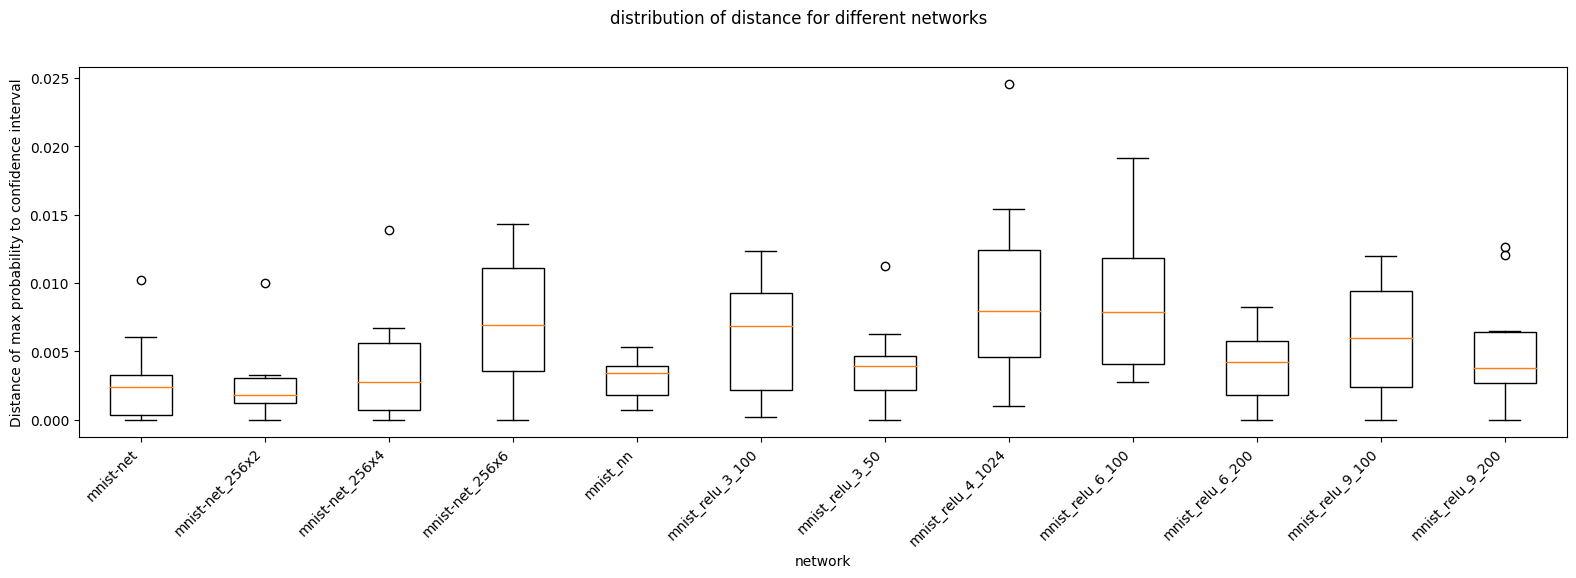

In [65]:
# same but for metric 3
dat3 = metric3.reshape(-1,10)
plots = {networks[i]: dat3[i] for i in range(len(networks))}
Boxplots(plots, figsize=(3,1), ylabel='Distance of max probability to confidence interval', xlabel='network', title='distribution of distance for different networks', xrot=True, save='Figures/Metrics Point/metric3_point.png')

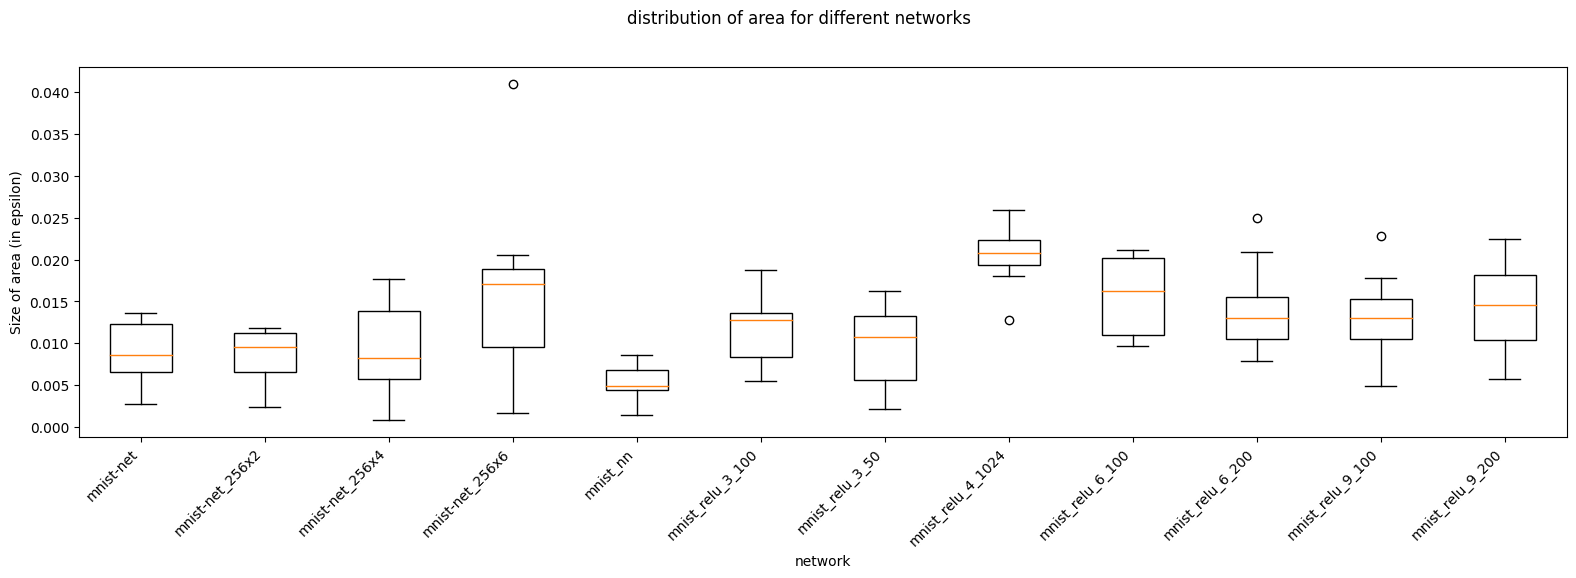

In [66]:
# same but for metric 4
dat4 = metric4.reshape(-1,10)
plots = {networks[i]: dat4[i] for i in range(len(networks))}
Boxplots(plots, figsize=(3,1), ylabel='Size of area (in epsilon)', xlabel='network', title='distribution of area for different networks', xrot=True, save='Figures/Metrics Point/metric4_point.png')
